# Simple Probability Model

The following example assumes all points in the unit square are equally likely to occur. Let *A* be the event that a randomly selected point is in some finite region contained in the sample space. As probabalistic model we let the probability of the event *A* be equal to the area of *A*. Selecting *N* random *(x,y)* pairs using a uniform distribution, the observed values of the events $A_1, A_2, A_3\hspace{1pt}$ are compared to the theoretical model.

		Theoretical 	 Observed
p(A1)		0.35		0.358
p(A1 & A2)	0.06		0.062
p(A1 & A2 & A3)	0.020000000000000004		0.018


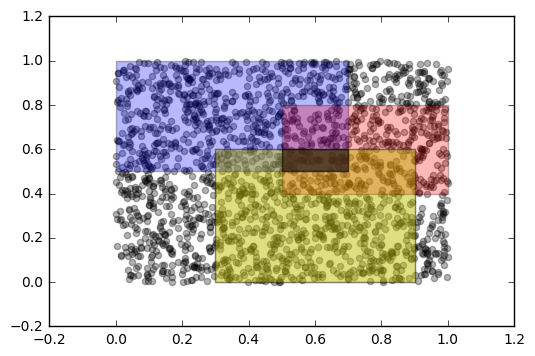

In [7]:
from numpy import random as r
import matplotlib.pyplot as plt
from functools import reduce

#draw a uniform random sample on the unit square
N = 500
sample = r.rand(2,N)
plt.scatter(sample[0],sample[1], c='k', alpha = 0.3)

#calculate observed probabilities
def inBoundsCount(v,x1,x2,y1,y2):
    if v[0]>=x1 and v[0]<=x2 and v[1]>=y1 and v[1]<=y2: return 1
    else: return 0

def pA(x1, x2, y1, y2):
    return reduce(lambda s,v: s + inBoundsCount(v, x1,x2,y1,y2), sample.T, 0)/float(N)

print("\t\tTheoretical \t Observed")
print("p(A1)\t\t{0}\t\t{1}".format(.5*.7, pA(0, .7, .5, 1.0)))
print("p(A1 & A2)\t{0}\t\t{1}".format(.2*.3,pA(.5, .7, .5, .8)))
print("p(A1 & A2 & A3)\t{0}\t\t{1}".format(.2*.1, pA(.5, .7, .5, .6)))


#fill in regions corresponding to events A1, A2, A3
#args to fill are X coords, Y coords
plt.fill([0, .7, .7, 0], [.5, .5, 1, 1],'b',alpha=0.1)
plt.fill([.5, 1.0, 1.0, .5], [.4, .4, .8, .8], 'r', alpha = 0.1)
plt.fill([.3, .9, .9, .3], [0, 0, .6, .6], 'y', alpha = 0.2)
plt.fill([.5, .7, .7, .5], [.5, .5, .6,.6], 'k', alpha = .3)

plt.show()

# Limit Theorems


Consider a sequence $X_1, X_2, \ldots \hspace{1pt}$ of independent i.i.d. random variables with mean $\mu\hspace{1pt}$ and variance $\sigma^2\hspace{1pt}$. Let 

$$S_n = \sum_{i=1}^n X_i$$

be a partial sum of the random variables. By **independence** we have

$$var\left(S_n\right) = \sum_{i=1}^n var\left(X_i\right) = n \sigma^2$$

We now define a new random variable, called the **sample mean** given by 

$$M_n = \frac{1}{n}\sum_{i=1}^n X_i = \frac{S_n}{n}$$

which has expected value and variance

$$E\left[M_n\right] = \mu \quad var\left(M_n\right) = \frac{\sigma^2}{n}$$

Notice that the variance of the sample mean decreases to zero as *n* increases, implying that most of the probability distribution for $M_\hspace{1pt}$ is close to the mean value. 

We also introduce the random variable 

$$Z_n = \frac{S_n - n\mu}{\sigma \sqrt{n}}$$

for which 

$$E\left[Z_n\right] = 0 \quad var\left(Z_n\right) = 1$$

## Markov Inequality


If a RV *X* can only take nonnegative values, then

$$P\left(X \ge a \right) \le \frac{E\left[X\right]}{a} \quad \forall a \gt 0$$


## Chebyshev Inequality


If *X* is a RV with mean $\mu \hspace{1pt}$ and variance $\sigma^2\hspace{1pt}$, then

$$P\left(\left| X - \mu \right| \ge c \right) \le \frac{\sigma^2}{c^2} \quad \forall c \gt 0$$

An alternative form of the Chebyshev inequality is obtained by letting $c=k\sigma\hspace{1pt}$ where *k* is postive. This gives

$$P\left(\left| X - \mu \right| \ge k\sigma \right) \le \frac{1}{k^2} $$

which indicates that the probability of an observation of the random variable *X* being more than *k* standard deviations from the mean is less than or equal to $$1/k^2\hspace{1pt}$. 


## Weak Law of Large Numbers

Let $X_1, X_2, \ldots \hspace{1pt}$ be i.i.d. RVs with mean $\mu\hspace{1pt}$. For **every** $\epsilon > 0 \hspace{1pt}$ 

$$\lim_{n\rightarrow \infty} P\left(\left|M_n - \mu \right| \ge \epsilon \right)= 0$$


## Convergence in Probability


Let $Y_1, Y_2, \ldots \hspace{1pt}$ be a sequence of RVs, *not necessarily independent*, and let *a* be a real number. We say that the sequence $Y_n \hspace{1pt}$ **converges to** *a* **in probability** if for every $\epsilon \gt 0 \hspace{1pt}$ we have

$$\lim_{n\rightarrow 0} P\left( \left| Y_n -a \right|  \gt \epsilon \right) = 0$$

This implies that the probability distribution of the random variables, $Y_n \hspace{1pt}$ converges to a distribution that is contained within a space of width $2\epsilon\hspace{1pt}$ around the point *a*. However this says nothing about the shape of the distribution. 

This can be rephrased in the following way: For every $\epsilon \gt 0 \hspace{1pt}$ and for any $\delta \gt 0 \hspace{1pt}$, there exists $n_0 \hspace{1pt}$ such that

$$ P\left( \left| Y_n -a \right|  \gt \epsilon \right) \le \delta \quad \forall n \ge n_0$$

where $\epsilon \hspace{1pt}$ is known as the **accuracy** and $\delta \hspace{1pt}$ is known as the **confidence**. 


## The Central Limit Theorem


Let $X_1, X_2, \ldots\hspace{1pt}$ be a sequence of i.i.d. random variables with common mean $\mu\hspace{1pt}$ and variance $\sigma^2\hspace{1pt}$ snd define

$$Z_n = \frac{1}{\sigma \sqrt{n}} \left[\sum_{i=1}^n X_i - n\mu\right]$$

Then, the **CDF** of $Z_n\hspace{1pt}$ converges to the standard normal CDF

$$\Phi\left(z\right) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^z e^{-x^2/2}dx$$

in the sense that 

$$\lim_{n\rightarrow \infty} P\left(Z_n \le z \right) = \Phi\left(z\right)$$

Note that there is an implicit assumption that the **mean and variance**, $\mu\hspace{1pt}$ and $\sigma^2\hspace{1pt}$, **are finite**. This does not hold for certain power law distributed RVs.

### Approximation of Probability of Sum of RVs

Let $S_n = X_1 + \ldots + X_n\hspace{1pt}$, where the $X_i\hspace{1pt}$ are i.i.d. RVs each with mean $\mu\hspace{1pt}$ and variance $\sigma^2\hspace{1pt}$. If *n* is large, the probability $P\left(S_n \le c \right)\hspace{1pt}$ can be approximated by 

1. Calculate $z = \left(c - n \mu\right)/\sigma\sqrt{n}\hspace{1pt}$

2. Use the approximation

$$P\left(S_n \le c \right) \approx \Phi\left(z\right)$$

where $\Phi\left(z\right)\hspace{1pt}$ is available from standard normal CDF tables.


### Approximation to the Binomial

If $S_n\hspace{1pt}$ is a binomial RV with parameters *n* and *p*, with large *n*, and *k, m* are nonnegative integers, then

$$P\left(k \le S_n \le m \right) \approx \Phi\left( \frac{m + \frac{1}{2} -np}{\sqrt{np\left(1-p\right)}}\right) - 
\Phi\left(\frac{k - \frac{1}{2} -np}{\sqrt{np\left(1-p\right)}}\right)$$